# MUC17 cis comparison

## Step 1: Library Imports

Run this cell to import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsMatter\\Brittany\\')
import functions as f

import cptac
import cptac.algorithms as al

## Step 2: Find the mutation frequency of MUC17 for Ovarian Cancer

In [3]:
ov = cptac.Ovarian()
desired_cutoff = 0.1
gene = 'MUC17'

freq_mut = al.get_frequently_mutated(ov, cutoff = desired_cutoff)
freq_mut.loc[freq_mut['Gene'] == gene]

,Gene,Unique_Samples_Mut,Missense_Mut,Truncation_Mut
7,MUC17,0.144578,0.144578,0.0


## Step 3: cis comparisons for omics 

Determine if the DNA mutation has an effect on the omics measurement. In order to do this, we have a few steps in code. These steps are found in the format_cis_comparison_data function.
1. get a table with both the omics and mutation data for tumors
2. get a binary column from the mutation data to separate our samples
3. format data frame to be used in the T-test
4. send data to the T-test.

The format_cis_comparison_data does the first 3 steps.

# Proteomics cis comparison

Proteomics: Mutated and Wildtype

In [4]:
prot_mut_status = f.format_cis_comparison_data(ov, 'proteomics', gene)

Not possible to do T-test. No data for MUC17 in proteomics


# Transcriptomics cis comparison

Transcriptomics: Mutated and Wildtype

In [5]:
trans_mut_status = f.format_cis_comparison_data(ov, 'transcriptomics', gene)

trans_col_list = [gene+'_transcriptomics']

print("Doing t-test comparison for mutation status\n")
trans_pval_results = al.wrap_ttest(trans_mut_status, 'binary_mutations', trans_col_list)
print(trans_pval_results)

Doing t-test comparison for mutation status

No significant comparisons.
None


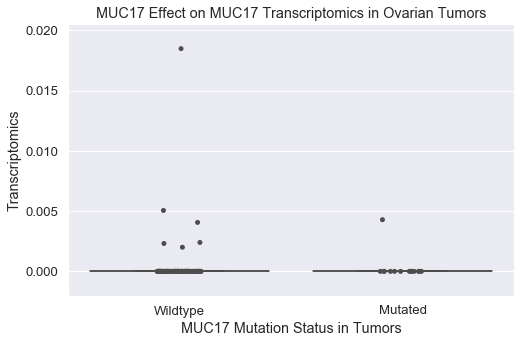

In [9]:
trans_col = gene+'_transcriptomics'

plt.rcParams['figure.figsize']=(8,5)
sns.set(font_scale = 1.2)
ov_cis_boxplot = sns.boxplot(data = trans_mut_status, x = 'binary_mutations',
                          y = trans_col, order = ["Wildtype","Mutated"], showfliers = False)  
ov_cis_boxplot.set_title(gene + " Effect on " + gene +" Transcriptomics in Ovarian Tumors")
ov_cis_boxplot = sns.stripplot(data = trans_mut_status, x = 'binary_mutations',y = trans_col, jitter = True, 
                        color = ".3", order = ["Wildtype","Mutated"])
ov_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Transcriptomics")
plt.show()
plt.clf()
plt.close()

Transcriptomics: Missense and Truncation

In [7]:
#FIX 
# select all wildtype from earlier -add to mut_type binary column
trans_wildtype = trans_mut_status.loc[trans_mut_status['binary_mutations'] == 'Wildtype'] 
trans_mut_type = f.get_missense_truncation_comparison(ov, 'transcriptomics', gene)
trans_mut_and_wildtype = trans_mut_type.append(trans_wildtype, sort=False) # use for graph


trans_col_list = [gene+'_transcriptomics']
# compare missense and wildtype
miss_wt = trans_mut_and_wildtype.loc[trans_mut_and_wildtype['binary_mutations'] != 'Truncation']
print("Doing t-test comparison for missense and wildtype\n")
results_prot_miss = al.wrap_ttest(miss_wt, 'binary_mutations', trans_col_list)
print(results_prot_miss)

# no truncation 

Only missence type mutations found for MUC17. Not possible to compare truncation with wildtype.
Doing t-test comparison for missense and wildtype

No significant comparisons.
None


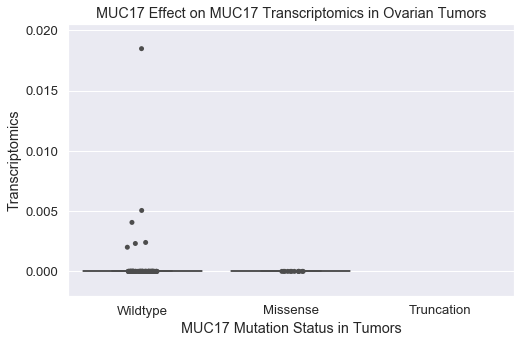

In [12]:
plt.rcParams['figure.figsize']=(8,5)
sns.set(font_scale = 1.2)
trans_cis_boxplot = sns.boxplot(data = trans_mut_and_wildtype, x = 'binary_mutations',
                          y = trans_col, order = ["Wildtype","Missense","Truncation"], showfliers = False)  
trans_cis_boxplot.set_title(gene + " Effect on " + gene +" Transcriptomics in Ovarian Tumors")
trans_cis_boxplot = sns.stripplot(data = trans_mut_and_wildtype, x = 'binary_mutations',y = trans_col, jitter = True, 
                        color = ".3", order = ["Wildtype","Missense","Truncation"])
trans_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Transcriptomics")
plt.show()
plt.clf()
plt.close()

# Phosphoproteomics cis comparison

Phosphoproteomics: Mutated and Wildtype

In [12]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
omics_and_mut = ov.join_omics_to_mutations(
    mutations_genes = gene, omics_df_name = 'phosphoproteomics', omics_genes = gene)

#  Compare common mutations

Find the common mutation types and compare them to the wildtype tumors.

In [13]:
# Count all mutations (including all mutations in a sample)
somatic_mutations = ov.get_mutations()
gene_mutations = somatic_mutations.loc[somatic_mutations['Gene'] == gene]
count_all_mut = gene_mutations['Mutation'].value_counts()
count_all_mut


Missense_Mutation    61
Silent               18
Name: Mutation, dtype: int64

In [1]:
mut = 'Missense_Mutation'
#gene_mutations.loc[gene_mutations['Mutation'] == mut]

# Analysis of Results

No cis comparisons are significant for transcriptomics. No data for MUC17 in proteomics and phosphoproteomics. Almost all mutations are missense.

No acetylproteomics for the ovarian dataset.